<a href="https://colab.research.google.com/github/aero-surge/Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

---



###Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

###1.Load the data and Libraries

---



Load the dataset using pandas. and
explore the pandas dataframe using the head() and info() functions.

In [ ]:
import matplotlib.pyplot as plt   # Importing matplotlib which will help us in data visualization
plt.style.use('ggplot')             
%matplotlib inline

In [ ]:
import numpy as np    # numpy is a Numerical programming package for the Python and will help us with large array vectors
import pandas as pd   # pandas is a Python library for data manipulation and analysis
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
data = pd.read_csv("/content/food_truck_data.txt")
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


###2: Visualize the data

---



Before starting on any task, it is often useful to understand the data by visualizing it. 

For this dataset, we can use a scatter plot using Seaborn to visualize the data, since it has only two variables: the profit and population.

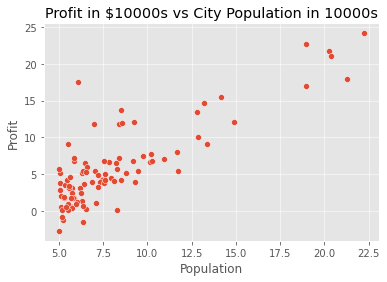

In [ ]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title("Profit in $10000s vs City Population in 10000s");

###3.Compute the cost ***J(0)***

We want to fit the linear regression parameters 𝜃 to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function J(𝜃).

You can think of the cost as the error your model made in estimating a value.

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [ ]:
m = data.Population.values.size
# add another dimension to accomodate the intercept term and set it to all ones
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis=1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

cost_function(X, y, theta)

32.072733877455676

###4.Gradient Descent

---



Recall that the parameters of our model are the 𝜃_j values.
and with these values we will adjust to minimize the cost J(𝜃). 

One way to do this is to use the batch gradient descent algorithm.
In batch gradient descent, each iteration performs the following update. 

With each step of gradient descent, the parameters 𝜃_j come closer to the optimal values that will achieve the lowest cost J(𝜃). 

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations): 
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
        
    return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=1000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.24 + 1.13x1


In [ ]:
costs[999]

4.515955503078913

### Task 6: Visualising the Cost Function $J(\theta)$
---

To better understand the cost function J(𝜃), we will plot the cost over a 2-dimensional grid of 𝜃_0 and 𝜃_1 values.

The purpose of this graph is to show you how J(𝜃) varies with changes in 𝜃_0 and 𝜃_1. 

We can see that the cost function J(𝜃) is bowl-shaped and has a global minimum. 


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

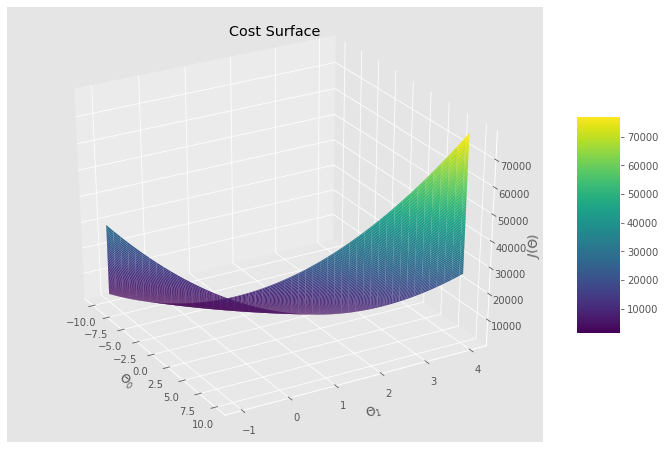

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

###6.plotting the convergence

---



Let’s plot how the cost function varies with the number of iterations. 

When we ran gradient descent previously, it returns the history of J(𝜃) values in a vector “costs”. 

We will now plot the J values against the number of iterations.

Plot $J(\theta)$ against the number of iterations of gradient descent:

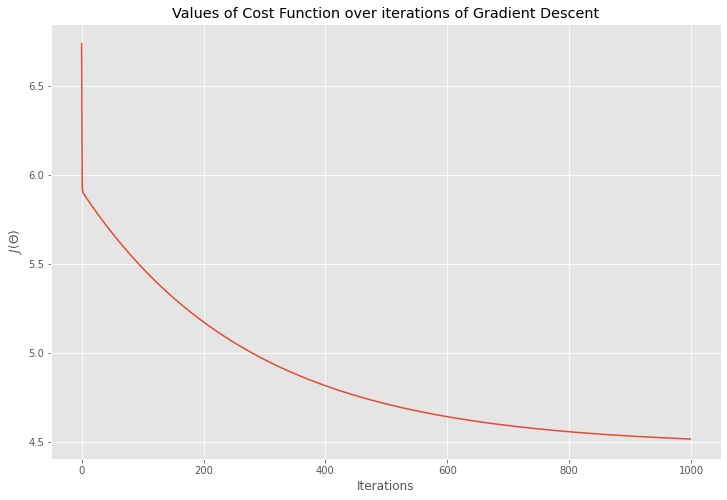

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### 7.Training Data with Linear Regression Fit
---

Now that we have correctly implemented and run gradient descent and arrived at the final parameters of our model, we can use these parameters to plot the linear fit. 

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[-3.24140214],
       [ 1.1272942 ]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


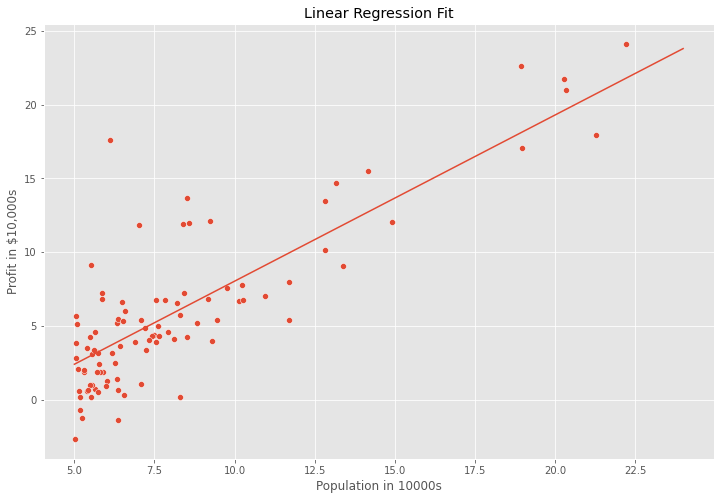

In [ ]:
theta = np.squeeze(theta)
sns.scatterplot(x = "Population", y= "Profit", data = data)

x_value=[x for x in range(5, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

let’s use our final values for 𝜃 to make predictions on profits in cities of 35,000 and 70,000 people. 

In [ ]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [ ]:
y_pred_1 = predict(np.array([1, 4]),theta) * 10000
print("For a population of 40,000, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000, the model predicts a profit of $12678.0


In [ ]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000, the model predicts a profit of $"+str(round(y_pred_2, 0)))

For a population of 83,000, the model predicts a profit of $61151.0
